In [3]:
import pandas as pd

In [2]:
df = pd.read_csv('Филя.csv')
df

,msg_id,sender,sender_id,reply_to_msg_id,date,date_unixtime,msg_type,msg_content,forwarded_from,action,has_mention,has_email,has_phone,has_hashtag,is_bot_command
0,28835,Timofei Ryko,user5017418518,NaN,2023-07-16T18:14:52,1689520492,text,Я теперь с этого акка в основном активен,NaN,NaN,0,0,0,0,0
1,28838,Timofei Ryko,user5017418518,NaN,2023-07-16T18:16:01,1689520561,text,Вот ещё плагин крутой - прямо в обсидиане анно...,NaN,NaN,0,0,0,0,0
2,28839,Timofei Ryko,user5017418518,NaN,2023-07-16T18:16:01,1689520561,link,https://github.com/elias-sundqvist/obsidian-an...,Timofei Ryko,NaN,0,0,0,0,0
3,28840,Timofei Ryko,user5017418518,NaN,2023-07-16T18:16:01,1689520561,text,"Опыт использования: 1 день, очень даже хорошо ...",Timofei Ryko,NaN,0,0,0,0,0
4,28861,Филя,user392040445,NaN,2023-07-16T18:20:28,1689520828,link,https://youtu.be/DtmwtjOoSYU?t=3094,NaN,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
872,398866,Timofei Ryko,user5017418518,398865.0,2024-12-30T00:21:07,1735507267,sticker,(File not included. Change data exporting sett...,NaN,NaN,0,0,0,0,0
873,398867,Timofei Ryko,user5017418518,NaN,2024-12-30T00:21:23,1735507283,text,"У меня как раз учеба начинает, но можно будет ...",NaN,NaN,0,0,0,0,0
874,398868,Филя,user392040445,NaN,2024-12-30T00:21:24,1735507284,text,В январе поменяю работу. Расскажу тогда,NaN,NaN,0,0,0,0,0
875,398869,Timofei Ryko,user5017418518,398868.0,2024-12-30T00:21:39,1735507299,sticker,(File not included. Change data exporting sett...,NaN,NaN,0,0,0,0,0


In [47]:
all_messages = df['msg_content'].str.cat(sep='\n\n')
print(len(all_messages))

72140


In [48]:
import nltk

In [50]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dreamtim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('russian') + stopwords.words('english')
STOPWORDS += ['https', 'http', 'com', 'спасибо', 'пожалуйста', 'это', 'вообще', 'вроде']

CUSTOM_STOPWORDS_STR = '''
бы
во
вы
да
до
ее
ей
ею
её
же
за
из
им
их
ли
мы
на
не
ни
но
ну
нх
об
он
от
по
со
та
те
то
ту
ты
уж
без
был
вам
вас
ваш
вон
вот
все
всю
вся
всё
где
год
два
две
дел
для
его
ему
еще
ещё
или
ими
имя
как
кем
ком
кто
лет
мне
мог
мож
мои
мой
мор
моя
моё
над
нам
нас
наш
нее
ней
нем
нет
нею
неё
них
оба
она
они
оно
под
пор
при
про
раз
сам
сих
так
там
тем
тех
том
тот
тою
три
тут
уже
чем
что
эта
эти
это
эту
алло
буду
будь
бывь
была
были
было
быть
вами
ваша
ваше
ваши
ведь
весь
вниз
всем
всех
всею
года
году
даже
двух
день
если
есть
зато
кого
кому
куда
лишь
люди
мало
меля
меня
мимо
мира
мной
мною
мочь
надо
нами
наша
наше
наши
него
нему
ниже
ними
один
пока
пора
пять
рано
сама
сами
само
саму
свое
свои
свою
себе
себя
семь
стал
суть
твой
твоя
твоё
тебе
тебя
теми
того
тоже
тому
туда
хоть
хотя
чаще
чего
чему
чтоб
чуть
этим
этих
этой
этом
этот
более
будем
будет
будто
будут
вверх
вдали
вдруг
везде
внизу
время
всего
всеми
всему
всюду
давно
даром
долго
друго
жизнь
занят
затем
зачем
здесь
иметь
какая
какой
когда
кроме
лучше
между
менее
много
могут
может
можно
можхо
назад
низко
нужно
одной
около
опять
очень
перед
позже
после
потом
почти
пятый
разве
рядом
самим
самих
самой
самом
своей
своих
сеаой
снова
собой
собою
такая
также
такие
такое
такой
тобой
тобою
тогда
тысяч
уметь
часто
через
чтобы
шесть
этими
этого
этому
близко
больше
будете
будешь
бывает
важная
важное
важные
важный
вокруг
восемь
всегда
второй
далеко
дальше
девять
десять
должно
другая
другие
других
другое
другой
занята
занято
заняты
значит
именно
иногда
каждая
каждое
каждые
каждый
кругом
меньше
начала
нельзя
нибудь
никуда
ничего
обычно
однако
одного
отсюда
первый
потому
почему
просто
против
раньше
самими
самого
самому
своего
сейчас
сказал
совсем
теперь
только
третий
хорошо
хотеть
хочешь
четыре
шестой
восьмой
впрочем
времени
говорил
говорит
девятый
десятый
кажется
конечно
которая
которой
которые
который
которых
наверху
наконец
недавно
немного
нередко
никогда
однажды
посреди
сегодня
седьмой
сказала
сказать
сколько
слишком
сначала
спасибо
человек
двадцать
довольно
которого
наиболее
недалеко
особенно
отовсюду
двадцатый
миллионов
несколько
прекрасно
процентов
четвертый
двенадцать
непрерывно
пожалуйста
пятнадцать
семнадцать
тринадцать
двенадцатый
одиннадцать
пятнадцатый
семнадцатый
тринадцатый
шестнадцать
восемнадцать
девятнадцать
одиннадцатый
четырнадцать
шестнадцатый
восемнадцатый
девятнадцатый
действительно
четырнадцатый
многочисленная
многочисленное
многочисленные
многочисленный
'''

CUSTOM_STOPWORDS = CUSTOM_STOPWORDS_STR.split('\n')
STOPWORDS += CUSTOM_STOPWORDS

STOPWORDS = list(set(STOPWORDS))
print(len(STOPWORDS))

603


In [3]:
STOPWORDS

['',
 'только',
 'об',
 'если',
 'hasn',
 'на',
 'этому',
 'нередко',
 'само',
 'другой',
 'часто',
 'until',
 "she's",
 'their',
 "you're",
 'время',
 'вокруг',
 'оно',
 'седьмой',
 'или',
 'нх',
 'before',
 'две',
 'менее',
 'нас',
 'больше',
 'раз',
 'ему',
 'двадцатый',
 'an',
 'одной',
 'миллионов',
 'будь',
 'даже',
 'прекрасно',
 'этими',
 'сначала',
 'o',
 'между',
 'которая',
 'в',
 'восемнадцатый',
 'isn',
 'own',
 'занят',
 'нею',
 'значит',
 'после',
 'моя',
 'whom',
 'семнадцатый',
 'будет',
 'самой',
 'after',
 'пора',
 'тринадцатый',
 'or',
 'свое',
 'yours',
 'should',
 'у',
 'меля',
 'по',
 'под',
 'off',
 'сегодня',
 'but',
 'ваши',
 'внизу',
 'давно',
 'слишком',
 'бывь',
 'хотя',
 'from',
 'около',
 'хоть',
 'she',
 'by',
 'первый',
 'все',
 'ничего',
 'мои',
 'твоя',
 'семнадцать',
 'мира',
 'myself',
 'сказать',
 'год',
 'ваше',
 'above',
 'том',
 'other',
 'пятый',
 'over',
 'such',
 'лучше',
 'они',
 'which',
 'восемь',
 'многочисленный',
 'там',
 "shouldn't",
 

In [151]:
len(STOPWORDS)

336

In [107]:
from nltk.stem import WordNetLemmatizer 

In [ ]:
import re

# Remove (File not included. Change data exporting settings to download.) from the text

def clean_text(text, for_rf_idf=False):

    text = text.replace('(File not included. Change data exporting settings to download.)', '')

    # Clear characters other than numbers and letters of the alphabet only (english and russian)
    text = re.sub(r'[^A-Za-zА-Яа-яЁё ]', '', text, flags=re.IGNORECASE)

    if for_rf_idf:
        return ' '.join(sorted(text.split()))
    
    return text


In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

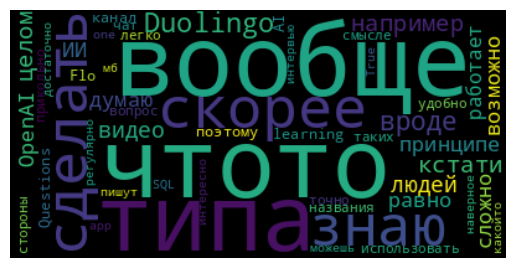

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=80, max_words=100, stopwords=STOPWORDS, min_font_size=20)
wordcloud.generate(clean_text(all_messages))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [177]:
df_germany = pd.read_csv('/home/dreamtim/Coding/saved-ai-bot/2024-12-30_03-44-25_Ковчег | Германия🇩🇪.csv')
df_germany

,msg_id,sender,sender_id,reply_to_msg_id,date,date_unixtime,msg_type,msg_content,forwarded_from,action,has_mention,has_email,has_phone,has_hashtag,is_bot_command
0,34,Boris Diaz,user172351257,NaN,2022-04-13T09:20:53,1649830853,text,"Доброе утро! Кто откуда? Я из Тюбингена, Ба-Вю",NaN,NaN,0,0,0,0,0
1,37,Екатерина,user2048893678,NaN,2022-04-13T09:22:06,1649830926,text,Доброе утро! Мы к сентябрю должны переехать во...,NaN,NaN,0,0,0,0,0
2,39,Boris Diaz,user172351257,37.0,2022-04-13T09:22:48,1649830968,text,Поздние переселенцы?,NaN,NaN,0,0,0,0,0
3,43,Iri X,user5148625151,NaN,2022-04-13T09:24:40,1649831080,text,"Нет, я живу уже 30 лет в Германии, вышла здесь...",NaN,NaN,0,0,0,0,0
4,45,Екатерина,user2048893678,39.0,2022-04-13T09:25:47,1649831147,text,"По работе , делаем голубую визу поэтому не быс...",NaN,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176340,211506,AK,user519739023,NaN,2024-12-30T02:21:03,1735514463,text,Кто нибудь знает не сложные хайкинг места возл...,NaN,NaN,0,0,0,0,0
176341,211507,Sergei Podunov,user137970234,211506.0,2024-12-30T02:28:26,1735514906,text,Komoot наверняка знает. Приложение такое,NaN,NaN,0,0,0,0,0
176342,211508,𝓟𝓪𝓼𝓱𝓪 ✞,user5063264999,NaN,2024-12-30T02:32:12,1735515132,text,"Подскажите, можно ли оформить проездной за 50 ...",NaN,NaN,0,0,0,0,0
176343,211509,Artur Kislitsyn,user352322711,211508.0,2024-12-30T02:46:40,1735516000,text,"Этот проездной, если вы про Deutschland Ticket...",NaN,NaN,0,0,0,0,0


In [178]:
df_germany_subset = df_germany.tail(50_000).copy()
df_germany_subset

,msg_id,sender,sender_id,reply_to_msg_id,date,date_unixtime,msg_type,msg_content,forwarded_from,action,has_mention,has_email,has_phone,has_hashtag,is_bot_command
126345,158055,Morne Taru,user165965330,157510.0,2023-12-01T13:28:32,1701426512,text,"СО это не углекислый газ (который СО2), а угар...",NaN,NaN,0,0,0,0,0
126346,158056,Atomic Instruction,user583095747,158055.0,2023-12-01T13:30:07,1701426607,text,QingPing air monitor измеряет со2 (я тоже его ...,NaN,NaN,0,0,0,0,0
126347,158057,NaN,user6235216361,158054.0,2023-12-01T13:32:34,1701426754,text,"Возьмите все с собой, включая дополнительные д...",NaN,NaN,0,0,0,0,0
126348,158058,лёша,user874636793,158057.0,2023-12-01T13:33:06,1701426786,text,а что такое автоматическая отбивка?),NaN,NaN,0,0,0,0,0
126349,158059,Morne Taru,user165965330,157582.0,2023-12-01T13:47:34,1701427654,text,Корона работает только в обратную сторону - из...,NaN,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176340,211506,AK,user519739023,NaN,2024-12-30T02:21:03,1735514463,text,Кто нибудь знает не сложные хайкинг места возл...,NaN,NaN,0,0,0,0,0
176341,211507,Sergei Podunov,user137970234,211506.0,2024-12-30T02:28:26,1735514906,text,Komoot наверняка знает. Приложение такое,NaN,NaN,0,0,0,0,0
176342,211508,𝓟𝓪𝓼𝓱𝓪 ✞,user5063264999,NaN,2024-12-30T02:32:12,1735515132,text,"Подскажите, можно ли оформить проездной за 50 ...",NaN,NaN,0,0,0,0,0
176343,211509,Artur Kislitsyn,user352322711,211508.0,2024-12-30T02:46:40,1735516000,text,"Этот проездной, если вы про Deutschland Ticket...",NaN,NaN,0,0,0,0,0


In [179]:
def words_count(text: str | float) -> int:
    if isinstance(text, float):
        return 0
    return len(text.split())

In [180]:
df_germany_subset['words_count'] = df_germany_subset['msg_content'].apply(words_count)

24.51668


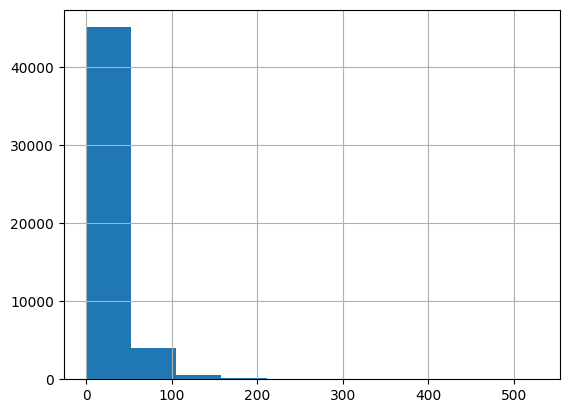

In [181]:
df_germany_subset['words_count'].hist()
print(df_germany_subset['words_count'].mean())

In [182]:
# Get 99 percentile
df_germany_subset['words_count'].quantile(0.99)

133.01000000000204

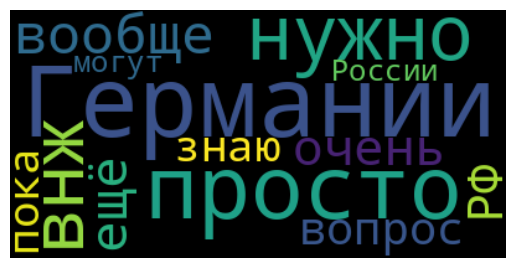

In [183]:
germany_all_messages = df_germany_subset['msg_content'].str.cat(sep='\n\n')
germany_all_messages = clean_text(germany_all_messages)
wordcloud.generate(germany_all_messages)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [184]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/dreamtim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
vectorizer = TfidfVectorizer()

In [186]:
germany_all_messages = [clean_text(message, for_rf_idf=True) for message in df_germany_subset['msg_content'] if isinstance(message, str)]
tfidf_matrix = vectorizer.fit_transform(germany_all_messages)

In [187]:
tfidf_matrix.shape

(49999, 77796)

In [188]:
column_sums = np.array(tfidf_matrix.sum(axis=0)).flatten()
column_names = vectorizer.get_feature_names_out()

result = pd.DataFrame({'feature': column_names, 'sum': column_sums})
result

,feature,sum
0,aa,1.247419
1,aajc,0.361564
2,aasee,0.173079
3,ab,18.224053
4,ababc,0.368663
...,...,...
77791,ёлкой,0.301277
77792,ёлку,0.370341
77793,ёлок,0.618440
77794,ёмкость,0.391547


In [190]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/dreamtim/nltk_data...


True

In [216]:
germany_all_messages = [clean_text(message, for_rf_idf=True) for message in df_germany_subset['msg_content'] if isinstance(message, str)]
tfidf_matrix = vectorizer.fit_transform(germany_all_messages)

column_sums = np.array(tfidf_matrix.sum(axis=0)).flatten()
column_names = vectorizer.get_feature_names_out()
word_frequencies = dict(zip(column_names, column_sums))

In [14]:
wordcloud = WordCloud(max_font_size=80, max_words=100, stopwords=STOPWORDS, min_font_size=10)


In [13]:
wordcloud = WordCloud(max_font_size=80, max_words=100, stopwords=STOPWORDS, min_font_size=10)
wordcloud.generate_from_frequencies(word_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'word_frequencies' is not defined

In [10]:
wordcloud = WordCloud(max_font_size=80, max_words=100, stopwords=STOPWORDS, min_font_size=15)


NameError: name 'STOPWORDS' is not defined

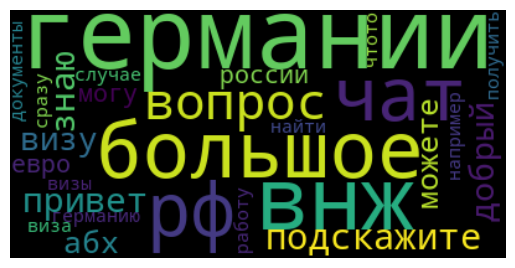

In [219]:
wordcloud = WordCloud(max_font_size=80, max_words=100, stopwords=STOPWORDS, min_font_size=15)
wordcloud.generate_from_frequencies(word_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

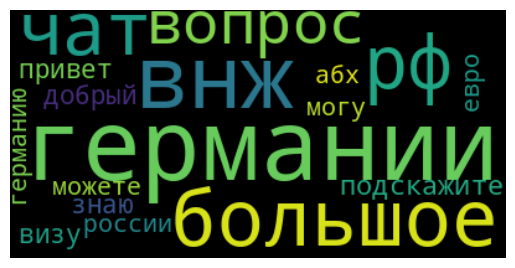

In [220]:
wordcloud = WordCloud(max_font_size=80, max_words=100, stopwords=STOPWORDS, min_font_size=20)
wordcloud.generate_from_frequencies(word_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
def generate_wordcloud(df: pd.DataFrame, column_name: str, stopwords: list[str], min_font_size: int = 20):
    all_messages = df[column_name].str.cat(sep='\n\n')
    all_messages = clean_text(all_messages)
    all_messages = [clean_text(message, for_rf_idf=True) for message in df[column_name] if isinstance(message, str)]
    tfidf_matrix = vectorizer.fit_transform(all_messages)

    column_sums = np.array(tfidf_matrix.sum(axis=0)).flatten()
    column_names = vectorizer.get_feature_names_out()
    word_frequencies = dict(zip(column_names, column_sums))

    wordcloud = WordCloud(max_font_size=80, max_words=100, stopwords=stopwords, min_font_size=min_font_size)
    wordcloud.generate_from_frequencies(word_frequencies)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

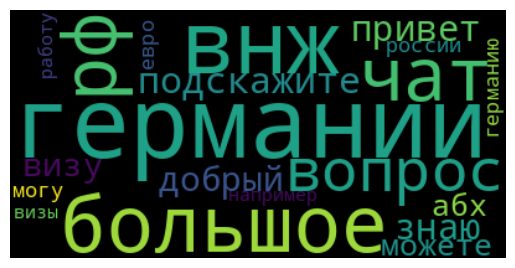

In [221]:
wordcloud = WordCloud(max_font_size=80, max_words=100, stopwords=STOPWORDS, min_font_size=15)
wordcloud.generate_from_frequencies(word_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

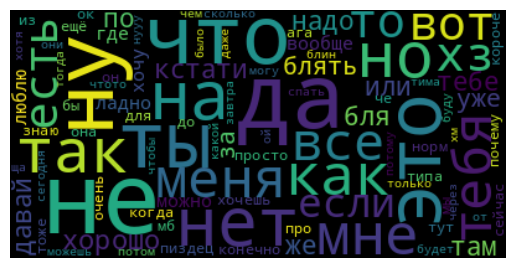

In [15]:
df_beloved = pd.read_csv('/home/dreamtim/Coding/saved-ai-bot/2025-01-04_01-13-11_Солнышко ☀️.csv')
all_messages_beloved = [clean_text(message, for_rf_idf=True) for message in df_beloved['msg_content'] if isinstance(message, str)]

vectorizer = TfidfVectorizer()
tfidf_matrix_beloved = vectorizer.fit_transform(all_messages_beloved)

column_sums_beloved = np.array(tfidf_matrix_beloved.sum(axis=0)).flatten()
column_names_beloved = vectorizer.get_feature_names_out()
word_frequencies_beloved = dict(zip(column_names_beloved, column_sums_beloved))

wordcloud.generate_from_frequencies(word_frequencies_beloved)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

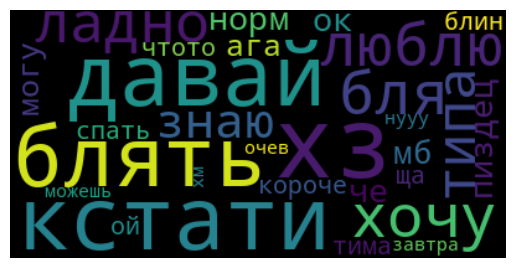

In [224]:
wordcloud_many_words = WordCloud(stopwords=STOPWORDS, min_font_size=10)

wordcloud_many_words.generate_from_frequencies(word_frequencies_beloved)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [230]:
len(df_beloved) / 15

5296.333333333333

# Functions

In [1]:
STOPWORDS = ['',
 'только',
 'об',
 'если',
 'hasn',
 'на',
 'этому',
 'нередко',
 'само',
 'другой',
 'часто',
 'until',
 "she's",
 'their',
 "you're",
 'время',
 'вокруг',
 'оно',
 'седьмой',
 'или',
 'нх',
 'before',
 'две',
 'менее',
 'нас',
 'больше',
 'раз',
 'ему',
 'двадцатый',
 'an',
 'одной',
 'миллионов',
 'будь',
 'даже',
 'прекрасно',
 'этими',
 'сначала',
 'o',
 'между',
 'которая',
 'в',
 'восемнадцатый',
 'isn',
 'own',
 'занят',
 'нею',
 'значит',
 'после',
 'моя',
 'whom',
 'семнадцатый',
 'будет',
 'самой',
 'after',
 'пора',
 'тринадцатый',
 'or',
 'свое',
 'yours',
 'should',
 'у',
 'меля',
 'по',
 'под',
 'off',
 'сегодня',
 'but',
 'ваши',
 'внизу',
 'давно',
 'слишком',
 'бывь',
 'хотя',
 'from',
 'около',
 'хоть',
 'she',
 'by',
 'первый',
 'все',
 'ничего',
 'мои',
 'твоя',
 'семнадцать',
 'мира',
 'myself',
 'сказать',
 'год',
 'ваше',
 'above',
 'том',
 'other',
 'пятый',
 'over',
 'such',
 'лучше',
 'они',
 'which',
 'восемь',
 'многочисленный',
 'там',
 "shouldn't",
 'тебе',
 'тогда',
 'десятый',
 'нам',
 'та',
 'тобой',
 'сам',
 'it',
 "it's",
 'но',
 'too',
 'лишь',
 'being',
 'году',
 'шесть',
 'которой',
 'where',
 'более',
 'можно',
 'мог',
 'даром',
 'просто',
 'собой',
 'самими',
 'дел',
 'будто',
 'кто',
 'me',
 'more',
 'можхо',
 'during',
 'этом',
 'года',
 'in',
 'сами',
 "doesn't",
 'тою',
 'didn',
 'our',
 'своей',
 'было',
 'есть',
 'жизнь',
 'needn',
 'вам',
 'чтобы',
 'суть',
 'меньше',
 'наверху',
 'были',
 'семь',
 'будем',
 'can',
 'самом',
 'совсем',
 'зато',
 'down',
 'над',
 'уже',
 'когда',
 'процентов',
 'wouldn',
 'тобою',
 'вроде',
 'be',
 'aren',
 'этой',
 'theirs',
 'многочисленные',
 'нее',
 "won't",
 'ее',
 'пять',
 'they',
 'будете',
 'ли',
 'because',
 'алло',
 'хотеть',
 'них',
 'hadn',
 'иногда',
 'ей',
 'потом',
 'бывает',
 'сказал',
 'здесь',
 'both',
 'дальше',
 'then',
 'for',
 'мне',
 'that',
 'очень',
 'каждые',
 'лет',
 'день',
 'mightn',
 'друго',
 'as',
 'out',
 'http',
 'having',
 "needn't",
 'была',
 'ком',
 'четвертый',
 'мочь',
 'тысяч',
 't',
 'мы',
 'any',
 'вон',
 'ваша',
 'при',
 'тебя',
 'he',
 'чем',
 'very',
 'тем',
 'десять',
 'самого',
 "didn't",
 'who',
 'их',
 'him',
 'сеаой',
 'мной',
 'some',
 'о',
 'herself',
 'бы',
 'couldn',
 'on',
 'чтоб',
 'именно',
 'собою',
 'шестнадцать',
 "shan't",
 'такая',
 'недавно',
 'человек',
 'будут',
 'куда',
 'самих',
 'с',
 'мож',
 'ниже',
 'себя',
 'иметь',
 've',
 'shan',
 'ту',
 'сейчас',
 'другая',
 'few',
 'of',
 'will',
 "mustn't",
 'what',
 'https',
 'each',
 'одиннадцать',
 'из',
 'нет',
 'отовсюду',
 'опять',
 "don't",
 'нужно',
 'до',
 'вас',
 'хорошо',
 'занято',
 'девятнадцатый',
 'который',
 'может',
 'него',
 "haven't",
 'да',
 'when',
 'три',
 'несколько',
 'позже',
 'тех',
 'ну',
 'себе',
 'чего',
 'рядом',
 'снова',
 'нами',
 'много',
 "couldn't",
 'haven',
 'почему',
 'и',
 'девять',
 'his',
 'тут',
 'наша',
 'кого',
 'my',
 'его',
 'будешь',
 'we',
 'wasn',
 'однако',
 'всю',
 'about',
 'if',
 'ours',
 'одиннадцатый',
 'does',
 'ain',
 'саму',
 'doesn',
 'ведь',
 'here',
 'mustn',
 'did',
 'пока',
 'ourselves',
 'the',
 'долго',
 'теми',
 'тринадцать',
 'важное',
 'нибудь',
 'важная',
 'того',
 'конечно',
 'won',
 'туда',
 'вот',
 'himself',
 'your',
 'вдали',
 'ни',
 'еще',
 'сих',
 'от',
 'i',
 'наш',
 'how',
 'низко',
 'y',
 'were',
 'назад',
 'so',
 'between',
 'am',
 'кругом',
 'эти',
 'are',
 'другие',
 'чуть',
 "should've",
 'заняты',
 'уж',
 'посреди',
 'этого',
 'same',
 'такой',
 're',
 'девятнадцать',
 'которые',
 'так',
 'ней',
 'твой',
 'мор',
 'вся',
 'люди',
 'довольно',
 'com',
 'затем',
 'themselves',
 'ваш',
 'yourself',
 'those',
 'со',
 'into',
 'not',
 'четырнадцать',
 "you'll",
 'was',
 'all',
 'had',
 'оба',
 'кому',
 'начала',
 "isn't",
 'рано',
 'моё',
 'своего',
 'стал',
 'должно',
 'потому',
 "you've",
 'm',
 'я',
 'тоже',
 'каждая',
 "hasn't",
 'only',
 'ними',
 'восемнадцать',
 'зачем',
 'with',
 'всего',
 "aren't",
 'её',
 'про',
 'против',
 'к',
 'нельзя',
 'just',
 'while',
 'надо',
 'пор',
 'шестнадцатый',
 'вверх',
 'below',
 'yourselves',
 'have',
 'наконец',
 'важный',
 'имя',
 'мною',
 'могут',
 'now',
 'ею',
 'далеко',
 'других',
 'всею',
 'за',
 'этих',
 'кажется',
 "wouldn't",
 'and',
 'самим',
 'хочешь',
 'do',
 'her',
 'всех',
 'тот',
 'буду',
 'непрерывно',
 'itself',
 'какой',
 'впрочем',
 'ним',
 'пятнадцать',
 'один',
 'ещё',
 'четырнадцатый',
 'весь',
 'всему',
 'не',
 'занята',
 'weren',
 'its',
 'наши',
 'мой',
 'you',
 'почти',
 'has',
 'вы',
 'раньше',
 'которого',
 'этим',
 'hers',
 "you'd",
 'most',
 'двенадцатый',
 'говорил',
 'сказала',
 'нем',
 'что',
 'такое',
 'это',
 'вами',
 'теперь',
 'многочисленное',
 'once',
 'under',
 'те',
 'shouldn',
 'разве',
 'свои',
 "weren't",
 'везде',
 'don',
 'для',
 'чаще',
 'близко',
 'неё',
 'кроме',
 'два',
 'действительно',
 'всем',
 'многочисленная',
 'наше',
 'against',
 'чему',
 'им',
 'пятнадцатый',
 'говорит',
 'тому',
 'вообще',
 'двенадцать',
 'further',
 'всюду',
 'd',
 'самому',
 'недалеко',
 'кем',
 'no',
 "mightn't",
 'такие',
 'them',
 'обычно',
 'немного',
 'девятый',
 'мало',
 'одного',
 'времени',
 'где',
 'то',
 'again',
 'он',
 'up',
 'второй',
 'каждый',
 'вдруг',
 'наиболее',
 'через',
 'пожалуйста',
 'также',
 'is',
 'ж',
 'каждое',
 'шестой',
 'другое',
 'свою',
 'был',
 'уметь',
 "hadn't",
 'которых',
 'она',
 'нему',
 'как',
 'восьмой',
 'ma',
 'than',
 'своих',
 'без',
 'сколько',
 'отсюда',
 'through',
 'твоё',
 'а',
 'во',
 'важные',
 'these',
 'двадцать',
 "that'll",
 'третий',
 'этот',
 'никогда',
 'вниз',
 'мимо',
 'быть',
 'меня',
 'четыре',
 'всеми',
 'особенно',
 'to',
 'всё',
 'this',
 's',
 'ты',
 'сама',
 'эту',
 'спасибо',
 'никуда',
 'why',
 'a',
 'эта',
 'же',
 'there',
 'какая',
 'перед',
 "wasn't",
 'ими',
 'doing',
 'двух',
 'всегда',
 'at',
 'однажды',
 'been',
 'nor',
 'll']

In [2]:
CHAT_PATH = '/home/dreamtim/Coding/saved-ai-bot/exported_chats/result_germany.json'

In [ ]:
from parse_telegram_json_polars import parse_telegram_chat

import polars as pl
from wordcloud import WordCloud


In [4]:
df, chat_name = parse_telegram_chat(CHAT_PATH)

In [5]:
%%timeit
df, chat_name = parse_telegram_chat(CHAT_PATH)

2.73 s ± 752 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
def generate_wordcloud_from_df(df: pl.DataFrame, column_name: str, stopwords: list[str], min_font_size: int = 15):
    all_messages = df[column_name].str.cat(sep='\n\n')
    all_messages = clean_text(all_messages)
    all_messages = [clean_text(message, for_rf_idf=True) for message in df[column_name] if isinstance(message, str)]
    tfidf_matrix = vectorizer.fit_transform(all_messages)

    column_sums = np.array(tfidf_matrix.sum(axis=0)).flatten()
    column_names = vectorizer.get_feature_names_out()
    word_frequencies = dict(zip(column_names, column_sums))

    wordcloud = WordCloud(max_font_size=80, max_words=100, stopwords=stopwords, min_font_size=min_font_size)
    wordcloud.generate_from_frequencies(word_frequencies)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

msg_id,sender,sender_id,reply_to_msg_id,date,date_unixtime,msg_type,msg_content,forwarded_from,action,has_mention,has_email,has_phone,has_hashtag,is_bot_command,chat_name
i64,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,str
158055,"""Morne Taru""","""user165965330""","""157510""","""2023-12-01T13:28:32""","""1701426512""","""text""","""СО это не углекислый газ (кото…","""""","""""",0,0,0,0,0,"""Ковчег | Германия🇩🇪"""
158056,"""Atomic Instruction""","""user583095747""","""158055""","""2023-12-01T13:30:07""","""1701426607""","""text""","""QingPing air monitor измеряет …","""""","""""",0,0,0,0,0,"""Ковчег | Германия🇩🇪"""
158057,null,"""user6235216361""","""158054""","""2023-12-01T13:32:34""","""1701426754""","""text""","""Возьмите все с собой, включая …","""""","""""",0,0,0,0,0,"""Ковчег | Германия🇩🇪"""
158058,"""лёша""","""user874636793""","""158057""","""2023-12-01T13:33:06""","""1701426786""","""text""","""а что такое автоматическая отб…","""""","""""",0,0,0,0,0,"""Ковчег | Германия🇩🇪"""
158059,"""Morne Taru""","""user165965330""","""157582""","""2023-12-01T13:47:34""","""1701427654""","""text""","""Корона работает только в обрат…","""""","""""",0,0,0,0,0,"""Ковчег | Германия🇩🇪"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
211506,"""AK""","""user519739023""","""""","""2024-12-30T02:21:03""","""1735514463""","""text""","""Кто нибудь знает не сложные ха…","""""","""""",0,0,0,0,0,"""Ковчег | Германия🇩🇪"""
211507,"""Sergei Podunov""","""user137970234""","""211506""","""2024-12-30T02:28:26""","""1735514906""","""text""","""Komoot наверняка знает. Прилож…","""""","""""",0,0,0,0,0,"""Ковчег | Германия🇩🇪"""
211508,"""𝓟𝓪𝓼𝓱𝓪 ✞""","""user5063264999""","""""","""2024-12-30T02:32:12""","""1735515132""","""text""","""Подскажите, можно ли оформить …","""""","""""",0,0,0,0,0,"""Ковчег | Германия🇩🇪"""
